<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries!

In [11]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: Averge scores for 4th Grade Math

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [12]:
# rename columns as in tutorial 2a to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# Will want all rows to have average 4th grade math score data, so remove rows with missing AVG_MATH_4_SCORE
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

# Will also want to see if there's a correlation between 4th grade reading and 4th grade math scores so remove rows missing AVG_READING_4_SCORE
df.dropna(subset=["AVG_READING_4_SCORE"], inplace=True)

# Will also want to use instruction expenditure as a percent of total expenditure as a feature so will remove rows missing INSTRUCTION_EXPENDITURE and TOTAL_EXPENDITURE
df.dropna(subset=["INSTRUCTION_EXPENDITURE"], inplace=True)
df.dropna(subset=["TOTAL_EXPENDITURE"], inplace=True)

# Will also want to see instruction expenditure per student so remove rows missing ENROLL_ALL
df.dropna(subset=["ENROLL_ALL"], inplace=True)
df.shape

(399, 25)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [13]:
# Create a variable representing the percentage of total expenditure allocated to instruction expenditure
df['PERCENT_INSTRUCTION_EXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
# Create a variable representing the instructional expenditure per student
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"]/df["ENROLL_ALL"]
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,PERCENT_INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.558333,2.025197
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.422130,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.553248,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.529091,2.732512
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,0.503079,2.680986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,0.543399,6.821412
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,0.477542,5.987842
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,0.524924,6.559344
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,0.495381,6.595384


Final feature list: Created Percent Instruction Expenditure and Instruction Expenditure per student as features

Feature selection justification: I think these features could be helpful in both seeing the priorities of states when it comes to educational spending and also if this educational spending/spending per student can be used as a predictor for 4th grade math scores

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Instruction Expenditure per Student Over Time, by State')

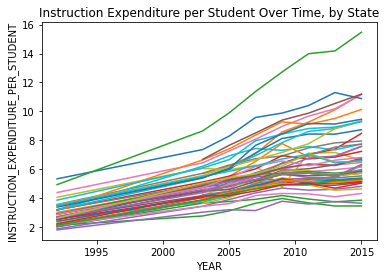

In [14]:
df.set_index('YEAR').groupby('STATE').INSTRUCTION_EXPENDITURE_PER_STUDENT.plot()
plt.ylabel('INSTRUCTION_EXPENDITURE_PER_STUDENT')
plt.title('Instruction Expenditure per Student Over Time, by State')

This first visualization helps give us insight into how spending per student has changed over time across each state. From the graph we can see that there is a general upward trend in the instructional spending per student stretching back from the 1990's to about 2015 across all states. Many states have a more subtle increase, but a few outliers have seen a drastic increase in spending.

Visualization 2

Text(0.5, 1.0, '4th Grade Math Score Over Time, by State')

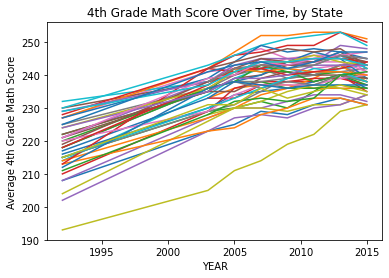

In [15]:
df.set_index('YEAR').groupby('STATE').AVG_MATH_4_SCORE.plot()
plt.ylabel('Average 4th Grade Math Score')
plt.title('4th Grade Math Score Over Time, by State')

This second graph shows us that from 1990's to 2015, there has been an overall steady increase in average math scores for 4th graders across all states. This positive trend, side-by-side with the positive trend from visualization 1, suggests that there could be some correlation between the increased instructional spending per student over time and 4th Grade math scores, but it isn't totally encapsulating. There are certainly other factors still to consider.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Use PERCENT_INSTRUCTION_EXPENDITURE, INSTRUCTION_EXPENDITURE_PER_STUDENT, and AVG_READING_4_SCORE as my input features
X = df[['PERCENT_INSTRUCTION_EXPENDITURE','INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Using regresssion with 4th grade math scores as the outcome variable, I think that "PERCENT_INSTRUCTION_EXPENDITURE", "INSTRUCTION_EXPENDITURE_PER_STUDENT", and "AVG_READING_4_SCORE", would be good predictors to look at. Based on the EDA above I think that at least instruction expenditure might serve as a good predictor as it seems to have a similar trend over time to that of 4th grade math scores.

In [19]:
# import your sklearn class here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
# create your model here
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

Text(0, 0.5, 'AVG_MATH_4_SCORE')

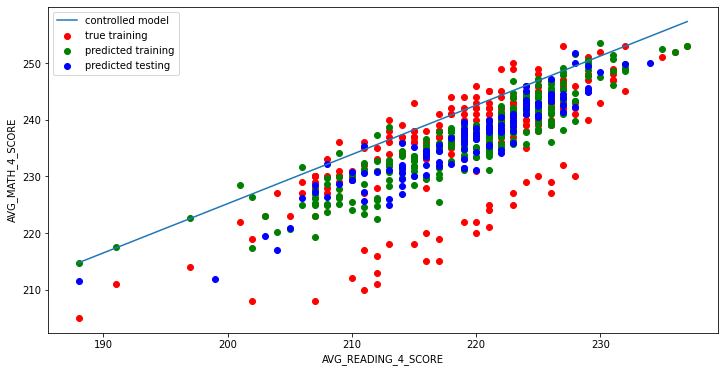

In [24]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "AVG_READING_4_SCORE"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG_MATH_4_SCORE")

In [26]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.7633897097869826

In [27]:
# mean error
np.mean(model.predict(X_test)-y_test)

0.26913998725428007

In [28]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

3.4921197549584595

In [29]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

4.887169791434628

<h2> Summary </h2>

I created a linear regression model with the hope of being able to predict 4th grade avg math scores. I chose my predictors (and input features for the model) to be the percentage of total expenditure allocated to instructional expenditure, the instructional expenditure per student, and the avg 4th grade reading scores. I trained the model using 70% of the data for and set aside 30% of it for testing. After creating the model, I ran it on the testing data and compared the predictions to the true values. The R-squared value resulting from the model was 76%, indicating a decent fit of the linear model on the data. Additionally, mean error was only .269 points, mean absolute error was 3.49 points, and the root mean squared error was 4.88 points. This shows that the model is by no means perfect, but is still a somewhat decent predictor of 4th grade math scores, especially considering that the scores fall between around 190 to 260 points. With this in mind, errors of about 5 points aren't all that bad, indicating that the features used may be worthwhile predictors to use in a more involved analysis in trying to predict 4th grade math scores.